# **Installing Dependencies**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# **Data Preprocessing**

In [9]:
df = pd.read_csv('/content/ipl_data.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## **Label Encoding**

In [10]:
categorical_cols = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
# Drop unused columns
df.drop(columns=['mid', 'date'], inplace=True)

## **Splitting the Data**

In [12]:
feature_cols = ['venue', 'bat_team', 'bowl_team', 'batsman',
                'bowler', 'runs', 'wickets', 'overs', 'striker']

In [13]:
X = df[feature_cols]
y = df['total']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Scaling the data**

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Training the Models**

In [16]:
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model3 = LinearRegression()

In [17]:
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
model2.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [19]:
model3.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions1 = model1.predict(X_test)
predictions1

array([133.86, 189.8 , 177.06, ..., 114.29, 130.55, 167.24])

In [21]:
predictions2 = model2.predict(X_test)
predictions2

array([139.42408668, 181.33739166, 141.65867019, ..., 147.60186135,
       145.85288662, 166.97049038])

In [22]:
predictions3 = model3.predict(X_test)
predictions3

array([141.00930295, 184.54484942, 141.06964818, ..., 136.56469033,
       156.85533726, 171.84573714])

# **Evaluating the Model and Plotting the Results**

In [23]:
# Model 1
mse_1 = mean_squared_error(y_test, predictions1)
mae_1 = mean_absolute_error(y_test, predictions1)
r2_1 = r2_score(y_test, predictions1)
rmse_1 = np.sqrt(mse_1)

print("Random Forest Regressor Model:")
print(f"Mean Squared Error: {mse_1:.2f}")
print(f"Root Mean Squared Error: {rmse_1:.2f}")
print(f"Mean Absolute Error: {mae_1:.2f}")
print(f"R-squared: {r2_1:.2f}")

Random Forest Regressor Model:
Mean Squared Error: 58.75
Root Mean Squared Error: 7.66
Mean Absolute Error: 4.43
R-squared: 0.93


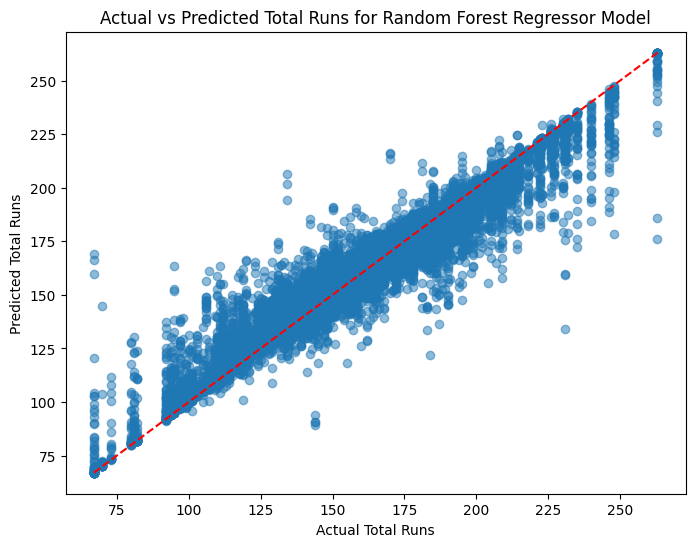

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions1, alpha=0.5)
plt.xlabel("Actual Total Runs")
plt.ylabel("Predicted Total Runs")
plt.title("Actual vs Predicted Total Runs for Random Forest Regressor Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [25]:
# Model 2
mse_2 = mean_squared_error(y_test, predictions2)
mae_2 = mean_absolute_error(y_test, predictions2)
r2_2 = r2_score(y_test, predictions2)
rmse_2 = np.sqrt(mse_2)

print("Gradient Boosting Regressor Model:")
print(f"Mean Squared Error: {mse_2:.2f}")
print(f"Root Mean Squared Error: {rmse_2:.2f}")
print(f"Mean Absolute Error: {mae_2:.2f}")
print(f"R-squared: {r2_2:.2f}")

Gradient Boosting Regressor Model:
Mean Squared Error: 374.53
Root Mean Squared Error: 19.35
Mean Absolute Error: 14.35
R-squared: 0.56


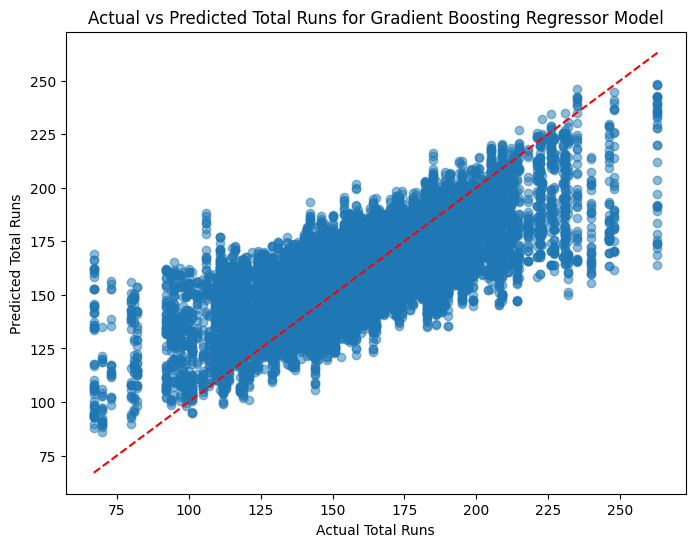

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions2, alpha=0.5)
plt.xlabel("Actual Total Runs")
plt.ylabel("Predicted Total Runs")
plt.title("Actual vs Predicted Total Runs for Gradient Boosting Regressor Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [27]:
# Model 3
mse_3 = mean_squared_error(y_test, predictions3)
mae_3 = mean_absolute_error(y_test, predictions3)
r2_3 = r2_score(y_test, predictions3)
rmse_3 = np.sqrt(mse_3)

print("Linear Regression Model Model:")
print(f"Mean Squared Error: {mse_3:.2f}")
print(f"Root Mean Squared Error: {rmse_3:.2f}")
print(f"Mean Absolute Error: {mae_3:.2f}")
print(f"R-squared: {r2_3:.2f}")

Linear Regression Model Model:
Mean Squared Error: 406.73
Root Mean Squared Error: 20.17
Mean Absolute Error: 14.90
R-squared: 0.52


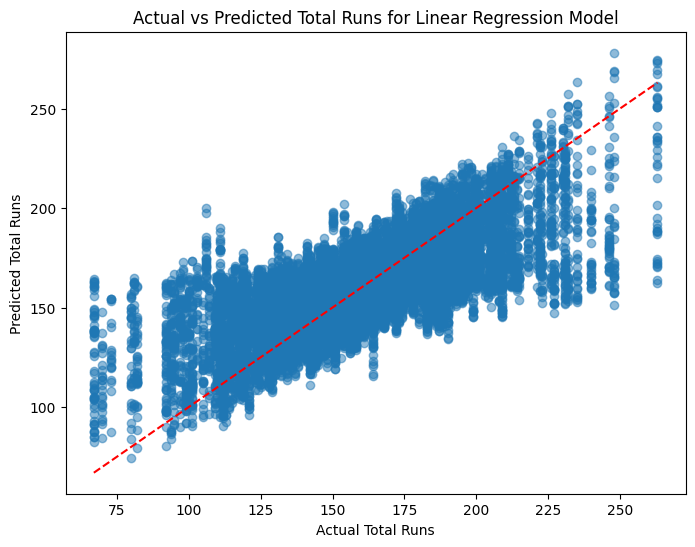

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions3, alpha=0.5)
plt.xlabel("Actual Total Runs")
plt.ylabel("Predicted Total Runs")
plt.title("Actual vs Predicted Total Runs for Linear Regression Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# **Interactive Window**

In [29]:
# best model of the 3 models
if r2_1 > r2_2 and r2_1 > r2_3:
    model = model1
    print("Random Forest Regressor is the best model")
elif r2_2 > r2_1 and r2_2 > r2_3:
    model = model2
    print("Gradient Boosting Regressor is the best model")
else:
    model = model3
    print("Linear Regression is the best model")

Random Forest Regressor is the best model


# **Saving the Best Model**

In [30]:
import joblib

to_save = {
    'model': model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_cols': feature_cols
}

In [31]:
joblib.dump(to_save, 'best_ML_model_pipeline.joblib')
print("Best model pipeline saved!")

Best model pipeline saved!
